# Tiến hành làm sạch dữ liệu cổ phiếu Amazon sau khi thu thập

    Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 
import warnings
warnings.filterwarnings('ignore')

    Đọc dữ liệu thô từ file raw_data.csv

In [3]:
data = pd.read_csv('./raw data/raw_data.csv').iloc[::-1]
data

,Date,Open,High,Low,Close,Adj Close,Volume
1763,May 21 2015,21.40,21.84,21.40,21.58,21.58,82428000
1762,May 22 2015,21.58,21.62,21.38,21.38,21.38,40412000
1761,May 26 2015,21.31,21.35,21.10,21.27,21.27,44884000
1760,May 27 2015,21.37,21.59,21.25,21.57,21.57,44622000
1759,May 28 2015,21.49,21.57,21.27,21.33,21.33,38248000
...,...,...,...,...,...,...,...
4,May 16 2022,113.10,113.99,110.35,110.81,110.81,74566000
3,May 17 2022,113.28,115.80,111.28,115.37,115.37,76448000
2,May 18 2022,111.44,112.85,106.25,107.11,107.11,108380000
1,May 19 2022,106.28,110.03,106.19,107.32,107.32,88142000


    Kiểm tra thông tin dữ liệu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 1763 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1764 non-null   object 
 1   Open       1764 non-null   float64
 2   High       1764 non-null   float64
 3   Low        1764 non-null   float64
 4   Close      1764 non-null   float64
 5   Adj Close  1764 non-null   float64
 6   Volume     1764 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.6+ KB


    Loại bỏ thành phần không mong muốn

In [5]:
data.drop(['Adj Close'], axis=1, inplace=True)
data

,Date,Open,High,Low,Close,Volume
1763,May 21 2015,21.40,21.84,21.40,21.58,82428000
1762,May 22 2015,21.58,21.62,21.38,21.38,40412000
1761,May 26 2015,21.31,21.35,21.10,21.27,44884000
1760,May 27 2015,21.37,21.59,21.25,21.57,44622000
1759,May 28 2015,21.49,21.57,21.27,21.33,38248000
...,...,...,...,...,...,...
4,May 16 2022,113.10,113.99,110.35,110.81,74566000
3,May 17 2022,113.28,115.80,111.28,115.37,76448000
2,May 18 2022,111.44,112.85,106.25,107.11,108380000
1,May 19 2022,106.28,110.03,106.19,107.32,88142000


    Lưu dữ liệu sau khi làm sạch vào file csv mới có tên là : clean_data.csv

In [6]:
filepath = Path('./clean data/clean_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath,index=False)  

    Vẽ giá cổ phiếu Amazon cho toàn bộ thời gian 2017-2022

Text(0.5, 1.0, 'Giá cổ phiếu Amazon cho toàn bộ thời gian (2017 - 2022)')

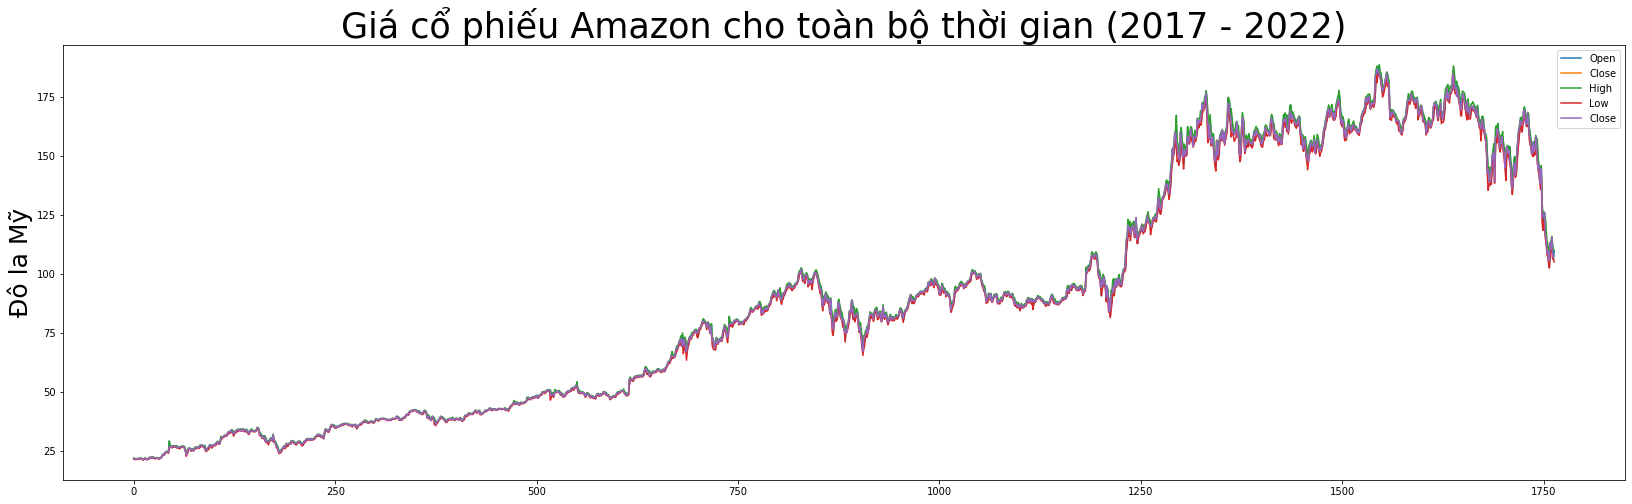

In [7]:
data_clean = pd.read_csv('./clean data/clean_data.csv')
data_clean[['Open', 'Close', 'High','Low','Close']].iloc[::-1].plot(figsize=(28,8))
plt.ylabel('Đô la Mỹ', fontsize = 25)
plt.title("Giá cổ phiếu Amazon cho toàn bộ thời gian (2017 - 2022)", fontsize=35)

    + Nếu chỉ sử dụng các biến có trong dataset thì rất khó để dự đoán vì sự biến thiên không nhiều. Bước tiếp theo chúng ta sẽ tạo thêm các đặc trưng mới.

    + Không thể xử lý ngoại lệ hoặc giảm chiều cho bộ dataset này vì sẽ làm mất tính biến thiên của thời gian